In [146]:
%pip install -U implicit seaborn==0.12.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [147]:
import json
from pathlib import Path
from typing import Tuple, Sequence, Set

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

### Read data

In [148]:
data_path = Path('./neymark-ml-recsys')

ratings = pd.read_csv(data_path / 'train_ratings.csv')
trainsactions = pd.read_csv(data_path / 'train_transactions.csv')
bookmarks = pd.read_csv(data_path / 'train_bookmarks.csv')

with open(data_path / 'catalogue.json', 'r') as f:
    meta_raw = json.load(f)

In [149]:
meta_raw

{'1983': {'type': 'movie',
  'availability': ['purchase', 'rent', 'subscription'],
  'duration': 140,
  'feature_1': 1657223.396513469,
  'feature_2': 0.7536096584,
  'feature_3': 39,
  'feature_4': 1.1194091265,
  'feature_5': 0.0,
  'attributes': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25]},
 '3783': {'type': 'movie',
  'availability': ['purchase', 'rent', 'subscription'],
  'duration': 110,
  'feature_1': 35565207.694893226,
  'feature_2': 0.7662537759,
  'feature_3': 41,
  'feature_4': 1.1386044027,
  'feature_5': 0.6547073468,
  'attributes': [1,
   26,
   27,
   28,
   29,
   7,
   30,
   31,
   32,
   10,
   14,
   15,
   33,
   19,
   20,
   21,
   34,
   35,
   36,
   37,
   25]},
 '5208': {'type': 'movie',
  'availability': ['purchase', 'rent', 'subscription'],
  'duration': 90,
  'feature_1': 13270676.52431015,
  'feature_2': 0.7654246597,
  'feature_3': 27

In [150]:
trainsactions

,element_uid,user_uid,consumption_mode,ts,watched_time,device_type,device_manufacturer
0,2570,408484,S,4.430483e+07,0,5,90
1,8522,408484,S,4.430481e+07,0,5,90
2,7642,428798,S,4.430480e+07,35,5,90
3,8330,428798,S,4.430480e+07,6350,5,90
4,8546,408484,S,4.430477e+07,0,5,90
...,...,...,...,...,...,...,...
7075303,2252,180823,S,4.173063e+07,2503,0,11
7075304,8436,458827,S,4.173063e+07,8360,0,50
7075305,8888,50431,S,4.173063e+07,5763,0,11
7075306,6099,59148,S,4.173063e+07,6831,0,50


In [151]:
trainsactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7075308 entries, 0 to 7075307
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   element_uid          int64  
 1   user_uid             int64  
 2   consumption_mode     object 
 3   ts                   float64
 4   watched_time         int64  
 5   device_type          int64  
 6   device_manufacturer  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 377.9+ MB


C:\Temp\ipykernel_3404\3342635242.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=trainsactions.corr(), vmin=-1, vmax=1, annot=True, fmt=".1f")


<AxesSubplot: >

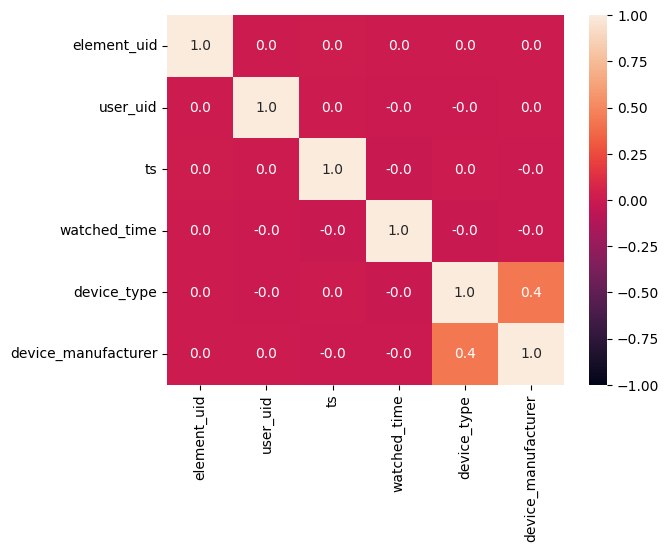

In [152]:
sns.heatmap(data=trainsactions.corr(), vmin=-1, vmax=1, annot=True, fmt=".1f")

In [153]:
ratings

,user_uid,element_uid,rating,ts
0,571252,3783,10,4.408089e+07
1,571252,5616,10,4.401264e+07
2,571252,2639,10,4.401099e+07
3,63140,2693,10,4.421830e+07
4,63140,9999,10,4.406648e+07
...,...,...,...,...
319240,264455,7513,10,4.173274e+07
319241,459192,1942,9,4.173266e+07
319242,359611,8895,10,4.173203e+07
319243,349307,3336,10,4.173197e+07


In [154]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319245 entries, 0 to 319244
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_uid     319245 non-null  int64  
 1   element_uid  319245 non-null  int64  
 2   rating       319245 non-null  int64  
 3   ts           319245 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 9.7 MB


<AxesSubplot: >

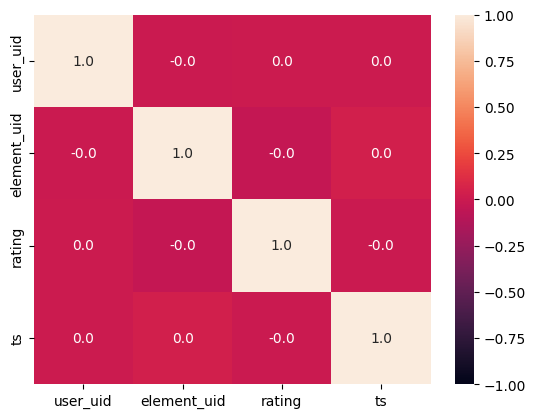

In [155]:
sns.heatmap(data=ratings.corr(), vmin=-1, vmax=1, annot=True, fmt=".1f")

In [156]:
bookmarks

,user_uid,element_uid,ts
0,102520,6284,4.413278e+07
1,102520,6052,4.368025e+07
2,102520,4621,4.336102e+07
3,92958,1634,4.399603e+07
4,92958,738,4.395091e+07
...,...,...,...
645897,433830,6400,4.173171e+07
645898,433830,8829,4.173170e+07
645899,433830,8919,4.173170e+07
645900,433830,2327,4.173169e+07


In [157]:
bookmarks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645902 entries, 0 to 645901
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_uid     645902 non-null  int64  
 1   element_uid  645902 non-null  int64  
 2   ts           645902 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 14.8 MB


<AxesSubplot: >

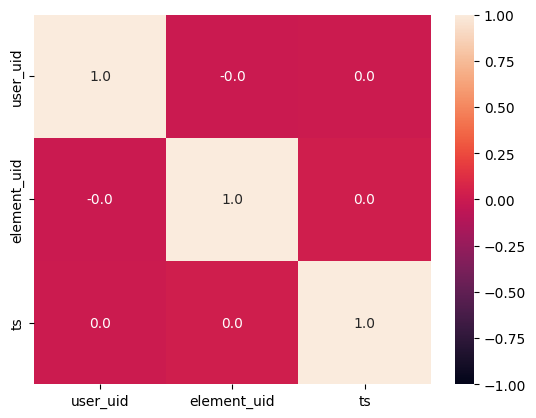

In [158]:
sns.heatmap(data=bookmarks.corr(), vmin=-1, vmax=1, annot=True, fmt=".1f")

### Bookmarks preprocessing

In [159]:
bookmarks["bookmark"] = 1

In [160]:
trainsactions = trainsactions.merge(bookmarks[[
        'element_uid', 
        'user_uid',
        'bookmark',
    ]], on=['element_uid', 'user_uid'], how='left')

In [161]:
trainsactions.fillna(value={"bookmark":0}, inplace=True)

In [162]:
trainsactions

,element_uid,user_uid,consumption_mode,ts,watched_time,device_type,device_manufacturer,bookmark
0,2570,408484,S,4.430483e+07,0,5,90,0.0
1,8522,408484,S,4.430481e+07,0,5,90,0.0
2,7642,428798,S,4.430480e+07,35,5,90,0.0
3,8330,428798,S,4.430480e+07,6350,5,90,0.0
4,8546,408484,S,4.430477e+07,0,5,90,0.0
...,...,...,...,...,...,...,...,...
7075303,2252,180823,S,4.173063e+07,2503,0,11,0.0
7075304,8436,458827,S,4.173063e+07,8360,0,50,0.0
7075305,8888,50431,S,4.173063e+07,5763,0,11,0.0
7075306,6099,59148,S,4.173063e+07,6831,0,50,0.0


### Train/test split

In [163]:
trainsactions['split_rank_per_user'] = (
    trainsactions
    .groupby('user_uid')['ts']
    .rank('first', ascending=False)
    .astype('int32')
)

trainsactions_train = (
    trainsactions
    .query('split_rank_per_user > 2')
    .drop(columns=['split_rank_per_user'])
)

trainsactions_test = (
    trainsactions
    .query('split_rank_per_user <= 2')
    .drop(columns=['split_rank_per_user'])
)[["element_uid", "user_uid"]]

In [164]:
trainsactions

,element_uid,user_uid,consumption_mode,ts,watched_time,device_type,device_manufacturer,bookmark,split_rank_per_user
0,2570,408484,S,4.430483e+07,0,5,90,0.0,1
1,8522,408484,S,4.430481e+07,0,5,90,0.0,2
2,7642,428798,S,4.430480e+07,35,5,90,0.0,1
3,8330,428798,S,4.430480e+07,6350,5,90,0.0,2
4,8546,408484,S,4.430477e+07,0,5,90,0.0,3
...,...,...,...,...,...,...,...,...,...
7075303,2252,180823,S,4.173063e+07,2503,0,11,0.0,18
7075304,8436,458827,S,4.173063e+07,8360,0,50,0.0,17
7075305,8888,50431,S,4.173063e+07,5763,0,11,0.0,28
7075306,6099,59148,S,4.173063e+07,6831,0,50,0.0,85


In [165]:
trainsactions_train

,element_uid,user_uid,consumption_mode,ts,watched_time,device_type,device_manufacturer,bookmark
4,8546,408484,S,4.430477e+07,0,5,90,0.0
5,9817,428798,S,4.430474e+07,4302,5,90,0.0
6,627,408484,S,4.430472e+07,0,5,90,0.0
7,3017,408484,S,4.430453e+07,777,0,90,0.0
12,6272,193139,S,4.430448e+07,7,0,50,0.0
...,...,...,...,...,...,...,...,...
7075303,2252,180823,S,4.173063e+07,2503,0,11,0.0
7075304,8436,458827,S,4.173063e+07,8360,0,50,0.0
7075305,8888,50431,S,4.173063e+07,5763,0,11,0.0
7075306,6099,59148,S,4.173063e+07,6831,0,50,0.0


In [166]:
trainsactions_test

,element_uid,user_uid
0,2570,408484
1,8522,408484
2,7642,428798
3,8330,428798
8,9006,73104
...,...,...
7070580,9633,264455
7072275,7109,140516
7072344,1579,140516
7073489,6976,167104


### Preprocess metainformation

In [167]:
def meta_to_df(meta_raw):
    element_uid = []
    duration = []
    type_ = []
    attributes = []
    availability = []
    feature_1 = []
    feature_2 = []
    feature_3 = []
    feature_4 = []
    feature_5 = []
    for k, v in meta_raw.items():
        element_uid.append(int(k))
        duration.append(float(v['duration']) * 60)
        type_.append(v['type'])
        attributes.append(v["attributes"])
        availability.append(v["availability"])
        feature_1.append(v["feature_1"])
        feature_2.append(v["feature_2"])
        feature_3.append(v["feature_3"])
        feature_4.append(v["feature_4"])
        feature_5.append(v["feature_5"])
    meta = pd.DataFrame({
        'element_uid': element_uid,
        'duration': duration,
        'type': type_,
        # "attributes": attributes,
        # "availability": attributes,
        "feature_1": feature_1,
        "feature_2": feature_2,
        "feature_3": feature_3,
        "feature_4": feature_4,
        "feature_5": feature_5,
    })
    return meta

meta = meta_to_df(meta_raw)

meta

,element_uid,duration,type,feature_1,feature_2,feature_3,feature_4,feature_5
0,1983,8400.0,movie,1.657223e+06,0.753610,39,1.119409,0.000000
1,3783,6600.0,movie,3.556521e+07,0.766254,41,1.138604,0.654707
2,5208,5400.0,movie,1.327068e+07,0.765425,27,1.131807,0.592716
3,9744,7200.0,movie,2.174992e+07,0.757874,26,1.133525,0.654707
4,1912,6600.0,movie,9.212964e+06,0.759566,7,1.110127,0.654707
...,...,...,...,...,...,...,...,...
10195,6643,3000.0,series,4.257040e+07,0.766254,9,1.133525,0.654707
10196,166,1800.0,series,4.306765e+07,0.692949,7,1.141929,0.680410
10197,9242,2400.0,series,2.542340e+07,0.651450,3,1.135231,0.654707
10198,6427,1800.0,series,1.345257e+07,0.766254,16,1.119409,-1.000000


In [168]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   element_uid  10200 non-null  int64  
 1   duration     10200 non-null  float64
 2   type         10200 non-null  object 
 3   feature_1    10200 non-null  float64
 4   feature_2    10200 non-null  float64
 5   feature_3    10200 non-null  int64  
 6   feature_4    10200 non-null  float64
 7   feature_5    10200 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 637.6+ KB


C:\Temp\ipykernel_3404\1767472480.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=meta.corr(), vmin=-1, vmax=1, annot=True, fmt=".1f")


<AxesSubplot: >

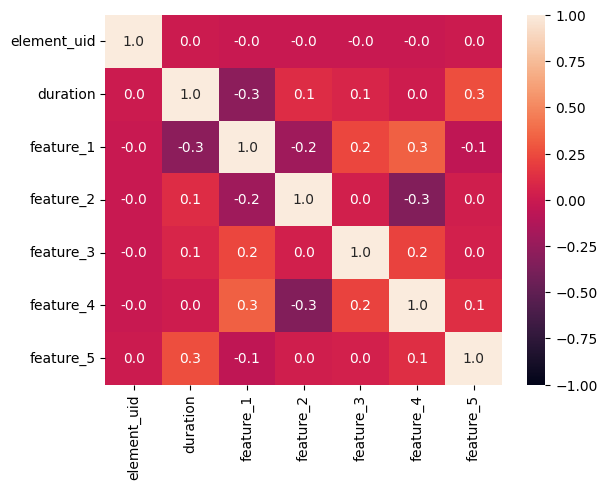

In [169]:
sns.heatmap(data=meta.corr(), vmin=-1, vmax=1, annot=True, fmt=".1f")

### Compute score for each transaction

In [170]:
def feature_normilize(feature:pd.Series) -> pd.Series:
    return (feature - feature.mean())/feature.std()

In [171]:
trainsactions_with_meta = (
    trainsactions_train
    .merge(meta[[
        'element_uid',
        'duration',
        'type',
        "feature_1",
        "feature_2",
        "feature_3",
        "feature_4",
        "feature_5",
    ]], on='element_uid', how='left')
)

trainsactions_with_meta["feature_1"] = feature_normilize(
    trainsactions_with_meta["feature_1"])
trainsactions_with_meta["feature_1"] = feature_normilize(
    trainsactions_with_meta["feature_2"])
trainsactions_with_meta["feature_3"] = feature_normilize(
    trainsactions_with_meta["feature_3"])
trainsactions_with_meta["feature_4"] = feature_normilize(
    trainsactions_with_meta["feature_4"])
trainsactions_with_meta["feature_5"] = feature_normilize(
    trainsactions_with_meta["feature_5"])

trainsactions_with_meta["main_feature"] = trainsactions_with_meta[["feature_1", "feature_2", "feature_3", "feature_4", "feature_5"]].mean(axis=1).round()


trainsactions_with_meta['watched_ratio'] = (
    trainsactions_with_meta['watched_time'] /
    trainsactions_with_meta['duration']
)


def score_transaction(t):
    score = 1
    if t['duration'] > 0:
        if t['type'] == 'movie':
            if t['watched_ratio'] > 0.3:
                score = int(t['watched_ratio'] * 9) + 1
        else:
            if t['watched_ratio'] > 1:
                score = int(t['watched_ratio'] / 2) + 1
    if t['bookmark'] > 0 and t['watched_ratio'] <= 0.3:
        score += 10
    return min(10, max(int(score+t["main_feature"]), 1))
    # return min(10, score)


trainsactions_with_meta['score'] = trainsactions_with_meta.apply(
    score_transaction, axis=1)


In [172]:
trainsactions_with_meta['score'].unique()

array([ 1,  6,  4, 10,  2,  9,  3,  5,  8,  7], dtype=int64)

In [173]:
trainsactions_with_meta["main_feature"]

0         -0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
6565605    0.0
6565606    0.0
6565607   -0.0
6565608    0.0
6565609   -1.0
Name: main_feature, Length: 6565610, dtype: float64

In [174]:
trainsactions_with_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6565610 entries, 0 to 6565609
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   element_uid          int64  
 1   user_uid             int64  
 2   consumption_mode     object 
 3   ts                   float64
 4   watched_time         int64  
 5   device_type          int64  
 6   device_manufacturer  int64  
 7   bookmark             float64
 8   duration             float64
 9   type                 object 
 10  feature_1            float64
 11  feature_2            float64
 12  feature_3            float64
 13  feature_4            float64
 14  feature_5            float64
 15  main_feature         float64
 16  watched_ratio        float64
 17  score                int64  
dtypes: float64(10), int64(6), object(2)
memory usage: 951.7+ MB


In [175]:
trainsactions_with_meta_and_ratings = (
    trainsactions_with_meta
    .merge(
        ratings[['user_uid', 'element_uid', 'rating']],
        on=['user_uid', 'element_uid'],
        how='outer'
    )
)

trainsactions_with_meta_and_ratings['score'].fillna(
    trainsactions_with_meta_and_ratings['rating'], inplace=True)

In [176]:
trainsactions_with_meta_and_ratings

,element_uid,user_uid,consumption_mode,ts,watched_time,device_type,device_manufacturer,bookmark,duration,type,feature_1,feature_2,feature_3,feature_4,feature_5,main_feature,watched_ratio,score,rating
0,8546,408484,S,4.430477e+07,0.0,5.0,90.0,0.0,4800.0,movie,-0.757087,0.688341,-0.871580,-0.434627,0.445763,-0.0,0.000000,1.0,NaN
1,9817,428798,S,4.430474e+07,4302.0,5.0,90.0,0.0,7200.0,movie,-0.667141,0.692949,0.716156,0.557013,0.531545,0.0,0.597500,6.0,NaN
2,627,408484,S,4.430472e+07,0.0,5.0,90.0,0.0,5400.0,movie,-0.059045,0.724104,-0.684788,-0.178263,0.445763,0.0,0.000000,1.0,NaN
3,3017,408484,S,4.430453e+07,777.0,0.0,90.0,0.0,5400.0,movie,0.600116,0.757874,-0.031014,-0.178263,0.445763,0.0,0.143889,1.0,NaN
4,6272,193139,S,4.430448e+07,7.0,0.0,50.0,0.0,6000.0,movie,-1.013220,0.675218,1.369930,0.477687,0.531545,0.0,0.001167,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636711,1819,264455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0
6636712,1942,459192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0
6636713,8895,359611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0
6636714,3336,349307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0


In [177]:
trainsactions_with_meta_and_ratings.isna().sum()

element_uid                  0
user_uid                     0
consumption_mode         71106
ts                       71106
watched_time             71106
device_type              71106
device_manufacturer      71106
bookmark                 71106
duration                 71106
type                     71106
feature_1                71106
feature_2                71106
feature_3                71106
feature_4                71106
feature_5                71106
main_feature             71106
watched_ratio            73710
score                        0
rating                 6317471
dtype: int64

In [178]:
trainsactions_with_meta_and_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6636716 entries, 0 to 6636715
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   element_uid          int64  
 1   user_uid             int64  
 2   consumption_mode     object 
 3   ts                   float64
 4   watched_time         float64
 5   device_type          float64
 6   device_manufacturer  float64
 7   bookmark             float64
 8   duration             float64
 9   type                 object 
 10  feature_1            float64
 11  feature_2            float64
 12  feature_3            float64
 13  feature_4            float64
 14  feature_5            float64
 15  main_feature         float64
 16  watched_ratio        float64
 17  score                float64
 18  rating               float64
dtypes: float64(15), int64(2), object(2)
memory usage: 1012.7+ MB


C:\Temp\ipykernel_3404\1250516603.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=trainsactions_with_meta_and_ratings.corr(), vmin=-1, vmax=1, annot=True, fmt=".1f")


<AxesSubplot: >

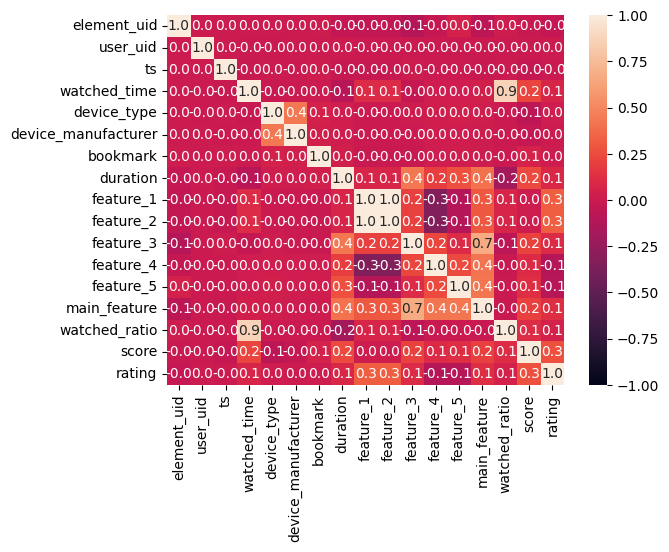

In [179]:
sns.heatmap(data=trainsactions_with_meta_and_ratings.corr(), vmin=-1, vmax=1, annot=True, fmt=".1f")

In [180]:
trainsactions_with_meta_and_ratings.drop(index=trainsactions_with_meta_and_ratings[trainsactions_with_meta_and_ratings["duration"].isna()].index, inplace=True)

In [181]:
trainsactions_with_meta_and_ratings

,element_uid,user_uid,consumption_mode,ts,watched_time,device_type,device_manufacturer,bookmark,duration,type,feature_1,feature_2,feature_3,feature_4,feature_5,main_feature,watched_ratio,score,rating
0,8546,408484,S,4.430477e+07,0.0,5.0,90.0,0.0,4800.0,movie,-0.757087,0.688341,-0.871580,-0.434627,0.445763,-0.0,0.000000,1.0,NaN
1,9817,428798,S,4.430474e+07,4302.0,5.0,90.0,0.0,7200.0,movie,-0.667141,0.692949,0.716156,0.557013,0.531545,0.0,0.597500,6.0,NaN
2,627,408484,S,4.430472e+07,0.0,5.0,90.0,0.0,5400.0,movie,-0.059045,0.724104,-0.684788,-0.178263,0.445763,0.0,0.000000,1.0,NaN
3,3017,408484,S,4.430453e+07,777.0,0.0,90.0,0.0,5400.0,movie,0.600116,0.757874,-0.031014,-0.178263,0.445763,0.0,0.143889,1.0,NaN
4,6272,193139,S,4.430448e+07,7.0,0.0,50.0,0.0,6000.0,movie,-1.013220,0.675218,1.369930,0.477687,0.531545,0.0,0.001167,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565605,2252,180823,S,4.173063e+07,2503.0,0.0,11.0,0.0,6000.0,movie,-0.909631,0.680525,-0.031014,0.477687,0.445763,0.0,0.417167,4.0,NaN
6565606,8436,458827,S,4.173063e+07,8360.0,0.0,50.0,0.0,5400.0,movie,-0.548997,0.699002,0.155779,0.477687,0.445763,0.0,1.548148,10.0,NaN
6565607,8888,50431,S,4.173063e+07,5763.0,0.0,11.0,0.0,6600.0,movie,-1.566962,0.646848,-0.871580,0.477687,0.531545,-0.0,0.873182,8.0,NaN
6565608,6099,59148,S,4.173063e+07,6831.0,0.0,50.0,0.0,7200.0,movie,0.533602,0.754467,-0.031014,0.317309,0.238867,0.0,0.948750,9.0,NaN


In [182]:
trainsactions_with_meta_and_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6565610 entries, 0 to 6565609
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   element_uid          int64  
 1   user_uid             int64  
 2   consumption_mode     object 
 3   ts                   float64
 4   watched_time         float64
 5   device_type          float64
 6   device_manufacturer  float64
 7   bookmark             float64
 8   duration             float64
 9   type                 object 
 10  feature_1            float64
 11  feature_2            float64
 12  feature_3            float64
 13  feature_4            float64
 14  feature_5            float64
 15  main_feature         float64
 16  watched_ratio        float64
 17  score                float64
 18  rating               float64
dtypes: float64(15), int64(2), object(2)
memory usage: 1001.8+ MB


### Apply TF-IDF encoding for transactions

In [183]:
from sklearn.preprocessing import LabelEncoder

def encode_tfidf_coo(transactions: pd.DataFrame) -> pd.DataFrame:
    score_sum_per_user = (
        transactions
        .groupby('user_uid')['score']
        .transform('sum')
    )
    user_count_per_element = (
        transactions
        .groupby('element_uid')['user_uid']
        .transform('size')
    )
    tf = transactions['score'].values / score_sum_per_user.values
    idf = np.log(len(score_sum_per_user) / user_count_per_element.values)
    
    tfidf = transactions[['user_uid', 'element_uid']].copy()
    tfidf['value'] = tf * idf

    return tfidf


def encode_tfidf(transactions: pd.DataFrame) -> Tuple[LabelEncoder, LabelEncoder, csr_matrix]:
    tfidf = encode_tfidf_coo(transactions)
    
    n_users = tfidf['user_uid'].nunique()
    n_elements = tfidf['element_uid'].nunique()

    user_encoder = LabelEncoder()
    element_encoder = LabelEncoder()
    user_index = user_encoder.fit_transform(transactions['user_uid'].values)
    element_index = element_encoder.fit_transform(transactions['element_uid'].values)

    tfidf_csr = csr_matrix(
        (
            tfidf['value'].astype('float32').values,
            (user_index, element_index)
        ),
        shape=(n_users, n_elements)
    )

    return user_encoder, element_encoder, tfidf_csr


user_encoder, element_encoder, transactions_csr = \
    encode_tfidf(trainsactions_with_meta_and_ratings)

In [184]:
transactions_csr

<254849x8249 sparse matrix of type '<class 'numpy.float32'>'
	with 6565610 stored elements in Compressed Sparse Row format>

In [185]:
print(f'sparsity = {(1 - transactions_csr.nnz / np.prod(transactions_csr.shape)) * 100:.4f}%') 

sparsity = 99.6877%


In [186]:
from implicit.als import AlternatingLeastSquares

als = AlternatingLeastSquares(factors=128, iterations=30, alpha=40.0, calculate_training_loss=True)
als.fit(transactions_csr)

100%|██████████| 50/50 [10:22<00:00, 12.45s/it, loss=0.00984]


### Infer ALS recommendations

In [187]:
recommendations_matrix, recommendations_scores = als.recommend(
    np.arange(0, transactions_csr.shape[0]), 
    transactions_csr, 
    N=200, 
    filter_already_liked_items=True
)

In [188]:
recommendations_matrix

array([[5820, 2637, 7677, ..., 6214, 6458, 7336],
       [ 674, 5825, 3147, ..., 6119, 4978, 5420],
       [2820, 8140, 2064, ..., 3514, 5302, 4059],
       ...,
       [4948,  730, 5107, ..., 4506,  845, 1457],
       [  17, 1107,   53, ..., 4127,   44,  116],
       [6562, 3157, 1975, ..., 6440,  231, 5426]])

In [189]:
recommendations_matrix.shape

(254849, 200)

In [190]:
recommendations_scores

array([[0.7292078 , 0.666174  , 0.6623485 , ..., 0.24909188, 0.24820337,
        0.24791858],
       [0.9045121 , 0.8856866 , 0.7847314 , ..., 0.16476962, 0.16447937,
        0.16354297],
       [0.8050308 , 0.79560274, 0.76202154, ..., 0.23266907, 0.23252885,
        0.23239914],
       ...,
       [0.863194  , 0.8422874 , 0.69078285, ..., 0.26444507, 0.26433143,
        0.26372597],
       [0.9529367 , 0.8127784 , 0.81074065, ..., 0.19068682, 0.19009595,
        0.18939285],
       [0.8371827 , 0.69536316, 0.67970204, ..., 0.1568554 , 0.15664777,
        0.15606119]], dtype=float32)

In [191]:
recommendations_scores.shape

(254849, 200)

In [192]:
def als_recommendations_to_df(
    recommendations_matrix: np.ndarray, 
    recommendations_scores: np.ndarray,
    user_encoder: LabelEncoder, 
    item_encoder: LabelEncoder,
    user_key = 'user_id',
    item_key = 'item_id'
) -> pd.DataFrame:
    recommendations_indices = pd.DataFrame({
        'user_index': np.arange(0, len(recommendations_matrix)),
        'item_index': list(recommendations_matrix),
        'score': list(recommendations_scores),
    })

    user_mapping = pd.DataFrame({
        'user_index': np.arange(0, len(user_encoder.classes_)),
        user_key: user_encoder.classes_,
    })

    item_mapping = pd.DataFrame({
        'item_index': np.arange(0, len(item_encoder.classes_)),
        item_key: item_encoder.classes_,
    })

    recommendations = (
        recommendations_indices
        .merge(
            user_mapping,
            on='user_index',
            how='left',
        )
        .drop(columns=['user_index'])
        .explode(['item_index', 'score'], ignore_index=True)
        .merge(
            item_mapping,
            on='item_index',
            how='left',
        )
        .drop(columns=['item_index'])
    )

    return recommendations


recommendations = als_recommendations_to_df(
    recommendations_matrix,
    recommendations_scores,
    user_encoder,
    element_encoder,
    user_key='user_uid',
    item_key='element_uid',
)

In [193]:
recommendations

,score,user_uid,element_uid
0,0.729208,0,7185
1,0.666174,0,3270
2,0.662349,0,9491
3,0.644029,0,7449
4,0.633987,0,1650
...,...,...,...
50969795,0.15827,593489,5730
50969796,0.158258,593489,2360
50969797,0.156855,593489,7965
50969798,0.156648,593489,287


In [194]:
def compute_recsys_metrics(
    predicted: pd.DataFrame,
    test: pd.DataFrame,
    k: int = 10,
    user_key = 'user_id',
    item_key = 'item_id'
):
    assert user_key in predicted.columns
    assert item_key in predicted.columns
    assert user_key in test.columns
    assert item_key in test.columns
    assert k > 0

    predicted_grouped = (
        predicted
        .groupby(user_key)
        .agg({item_key: list})
        .rename(columns={item_key: 'predicted'})
    )

    test_grouped = (
        test
        .groupby(user_key)
        .agg({item_key: set})
        .rename(columns={item_key: 'ground_truth'})
    )

    items_to_compare = predicted_grouped.merge(
        test_grouped,
        on=user_key,
        how='left'
    )

    metrics = (
        items_to_compare
        .apply(
            lambda row: _metrics(row['predicted'], row['ground_truth'], k),
            axis=1,
            result_type='expand'
        )
        .rename(columns={ 0: 'recall', 1: 'map' })
    )

    return metrics.mean().to_dict()


def _metrics(predicted: Sequence, ground_truth: Set, k: int):
    if not ground_truth:
        return 0.0, 0.0

    predicted_k = predicted[:k]

    # Recall@k
    intersection = ground_truth.intersection(predicted_k)
    recall = len(intersection) / min(len(ground_truth), len(predicted_k))

    # Average Precision (AP@k)
    num_hits = 0.0
    ap_sum = 0.0
    for i, pr in enumerate(predicted_k):
        if pr in ground_truth and pr not in predicted[:i]:
            num_hits += 1
            ap_sum += num_hits / (i + 1.0)
    ap_score = ap_sum / min(len(ground_truth), k)

    return recall, ap_score


compute_recsys_metrics(
    recommendations, 
    trainsactions_test, 
    k=10, 
    user_key='user_uid', 
    item_key='element_uid'
)

{'recall': 0.08817574328327756, 'map': 0.0343977038815453}